# FAKE INSTAGRAM ACCOUNT DETECTOR

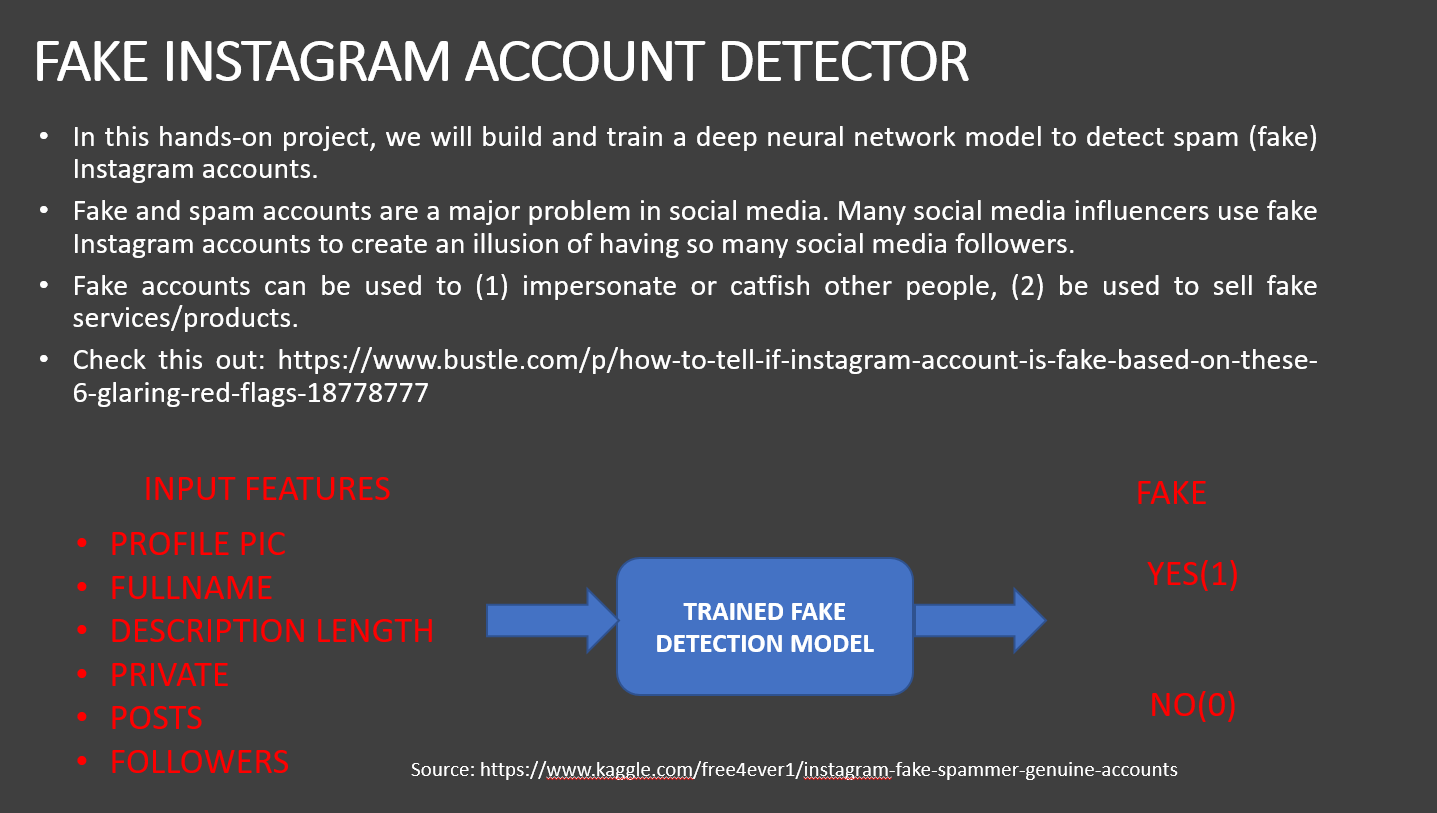

# IMPORTING DATASETS AND LIBRARIES

In [2]:
 !pip install tensorflow==2.0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [4]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 

In [5]:
# Load the training dataset
train_set = pd.read_csv('./insta_train.csv')
train_set.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [6]:
# Load the testing data
test_set = pd.read_csv('./insta_test.csv')
test_set.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


# EXPLORATORY DATA ANALYSIS

In [36]:
# Getting dataframe info
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [35]:
# Get the statistical summary of the dataframe
train_set.describe().round(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.0
mean,0.70,0.16,1.46,0.04,0.03,22.62,0.12,0.38,107.49,85307.24,508.38,0.5
std,0.46,0.21,1.05,0.13,0.18,37.70,0.32,0.49,402.03,910148.46,917.98,0.5
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,39.00,57.50,0.0
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,9.00,150.50,229.50,0.5
75%,1.00,0.31,2.00,0.00,0.00,34.00,0.00,1.00,81.50,716.00,589.50,1.0
max,1.00,0.92,12.00,1.00,1.00,150.00,1.00,1.00,7389.00,15338538.00,7500.00,1.0


In [34]:
# Checking if null values exist
train_set.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [32]:
# Get the number of unique values in the "profile pic" feature
train_set['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [33]:
# Get the number of unique values in "fake" (Target column)
train_set['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

In [37]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [39]:
test_set.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [41]:
test_set.describe().round(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.00,120.00,120.00,120.00,120.00,120.00,120.0,120.00,120.00,120.00,120.00,120.0
mean,0.76,0.18,1.55,0.07,0.04,27.20,0.1,0.31,82.87,49594.72,779.27,0.5
std,0.43,0.24,1.19,0.21,0.20,42.59,0.3,0.46,230.47,381612.59,1409.38,0.5
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,0.0
25%,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,1.00,67.25,119.25,0.0
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,8.00,216.50,354.50,0.5
75%,1.00,0.33,2.00,0.00,0.00,45.25,0.0,1.00,58.25,593.25,668.25,1.0
max,1.00,0.89,9.00,1.00,1.00,149.00,1.0,1.00,1879.00,4021842.00,7453.00,1.0


In [30]:
test_set['profile pic'].value_counts()

1    91
0    29
Name: profile pic, dtype: int64

In [31]:
test_set['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64

# DATA VISUALIZATION

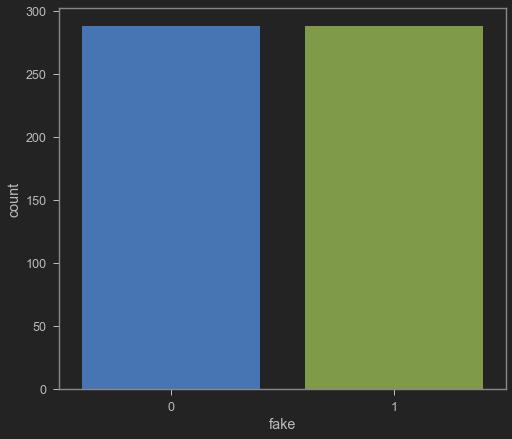

In [42]:
# Visualize the data
sns.countplot(train_set['fake'])

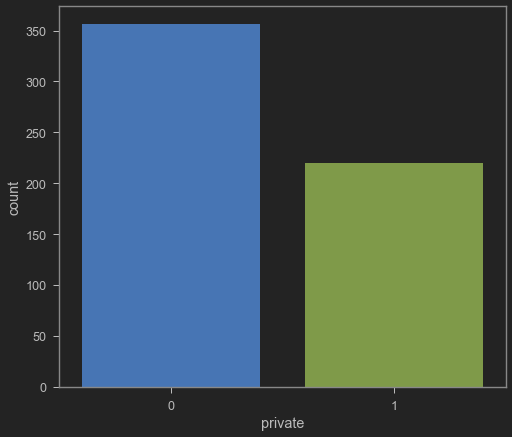

In [43]:
# Visualize the private column data
sns.countplot(train_set['private'])

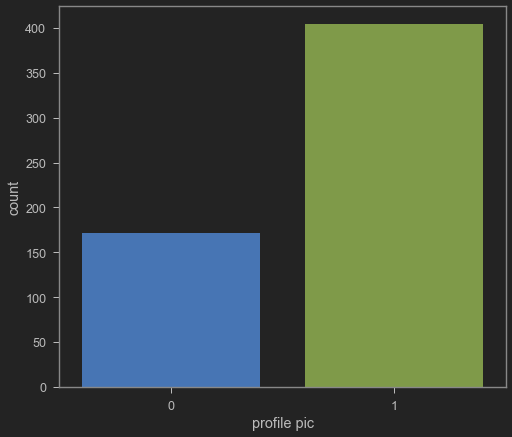

In [44]:
# Visualize the "profile pic" column data
sns.countplot(train_set['profile pic'])

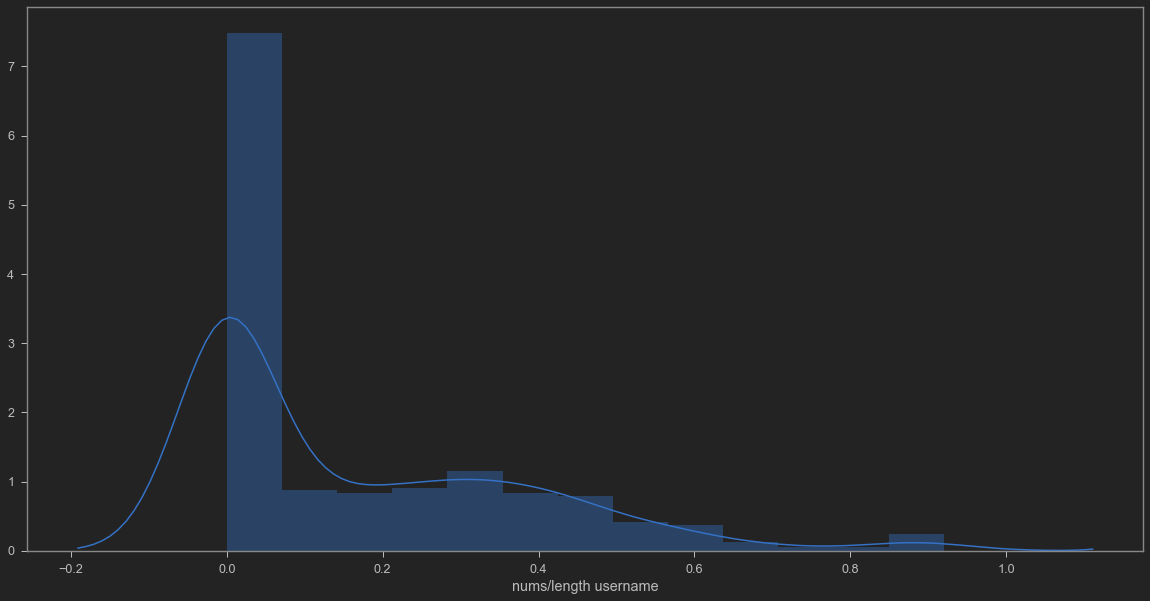

In [48]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(train_set['nums/length username'],kde=True)

<Figure size 1440x1440 with 0 Axes>

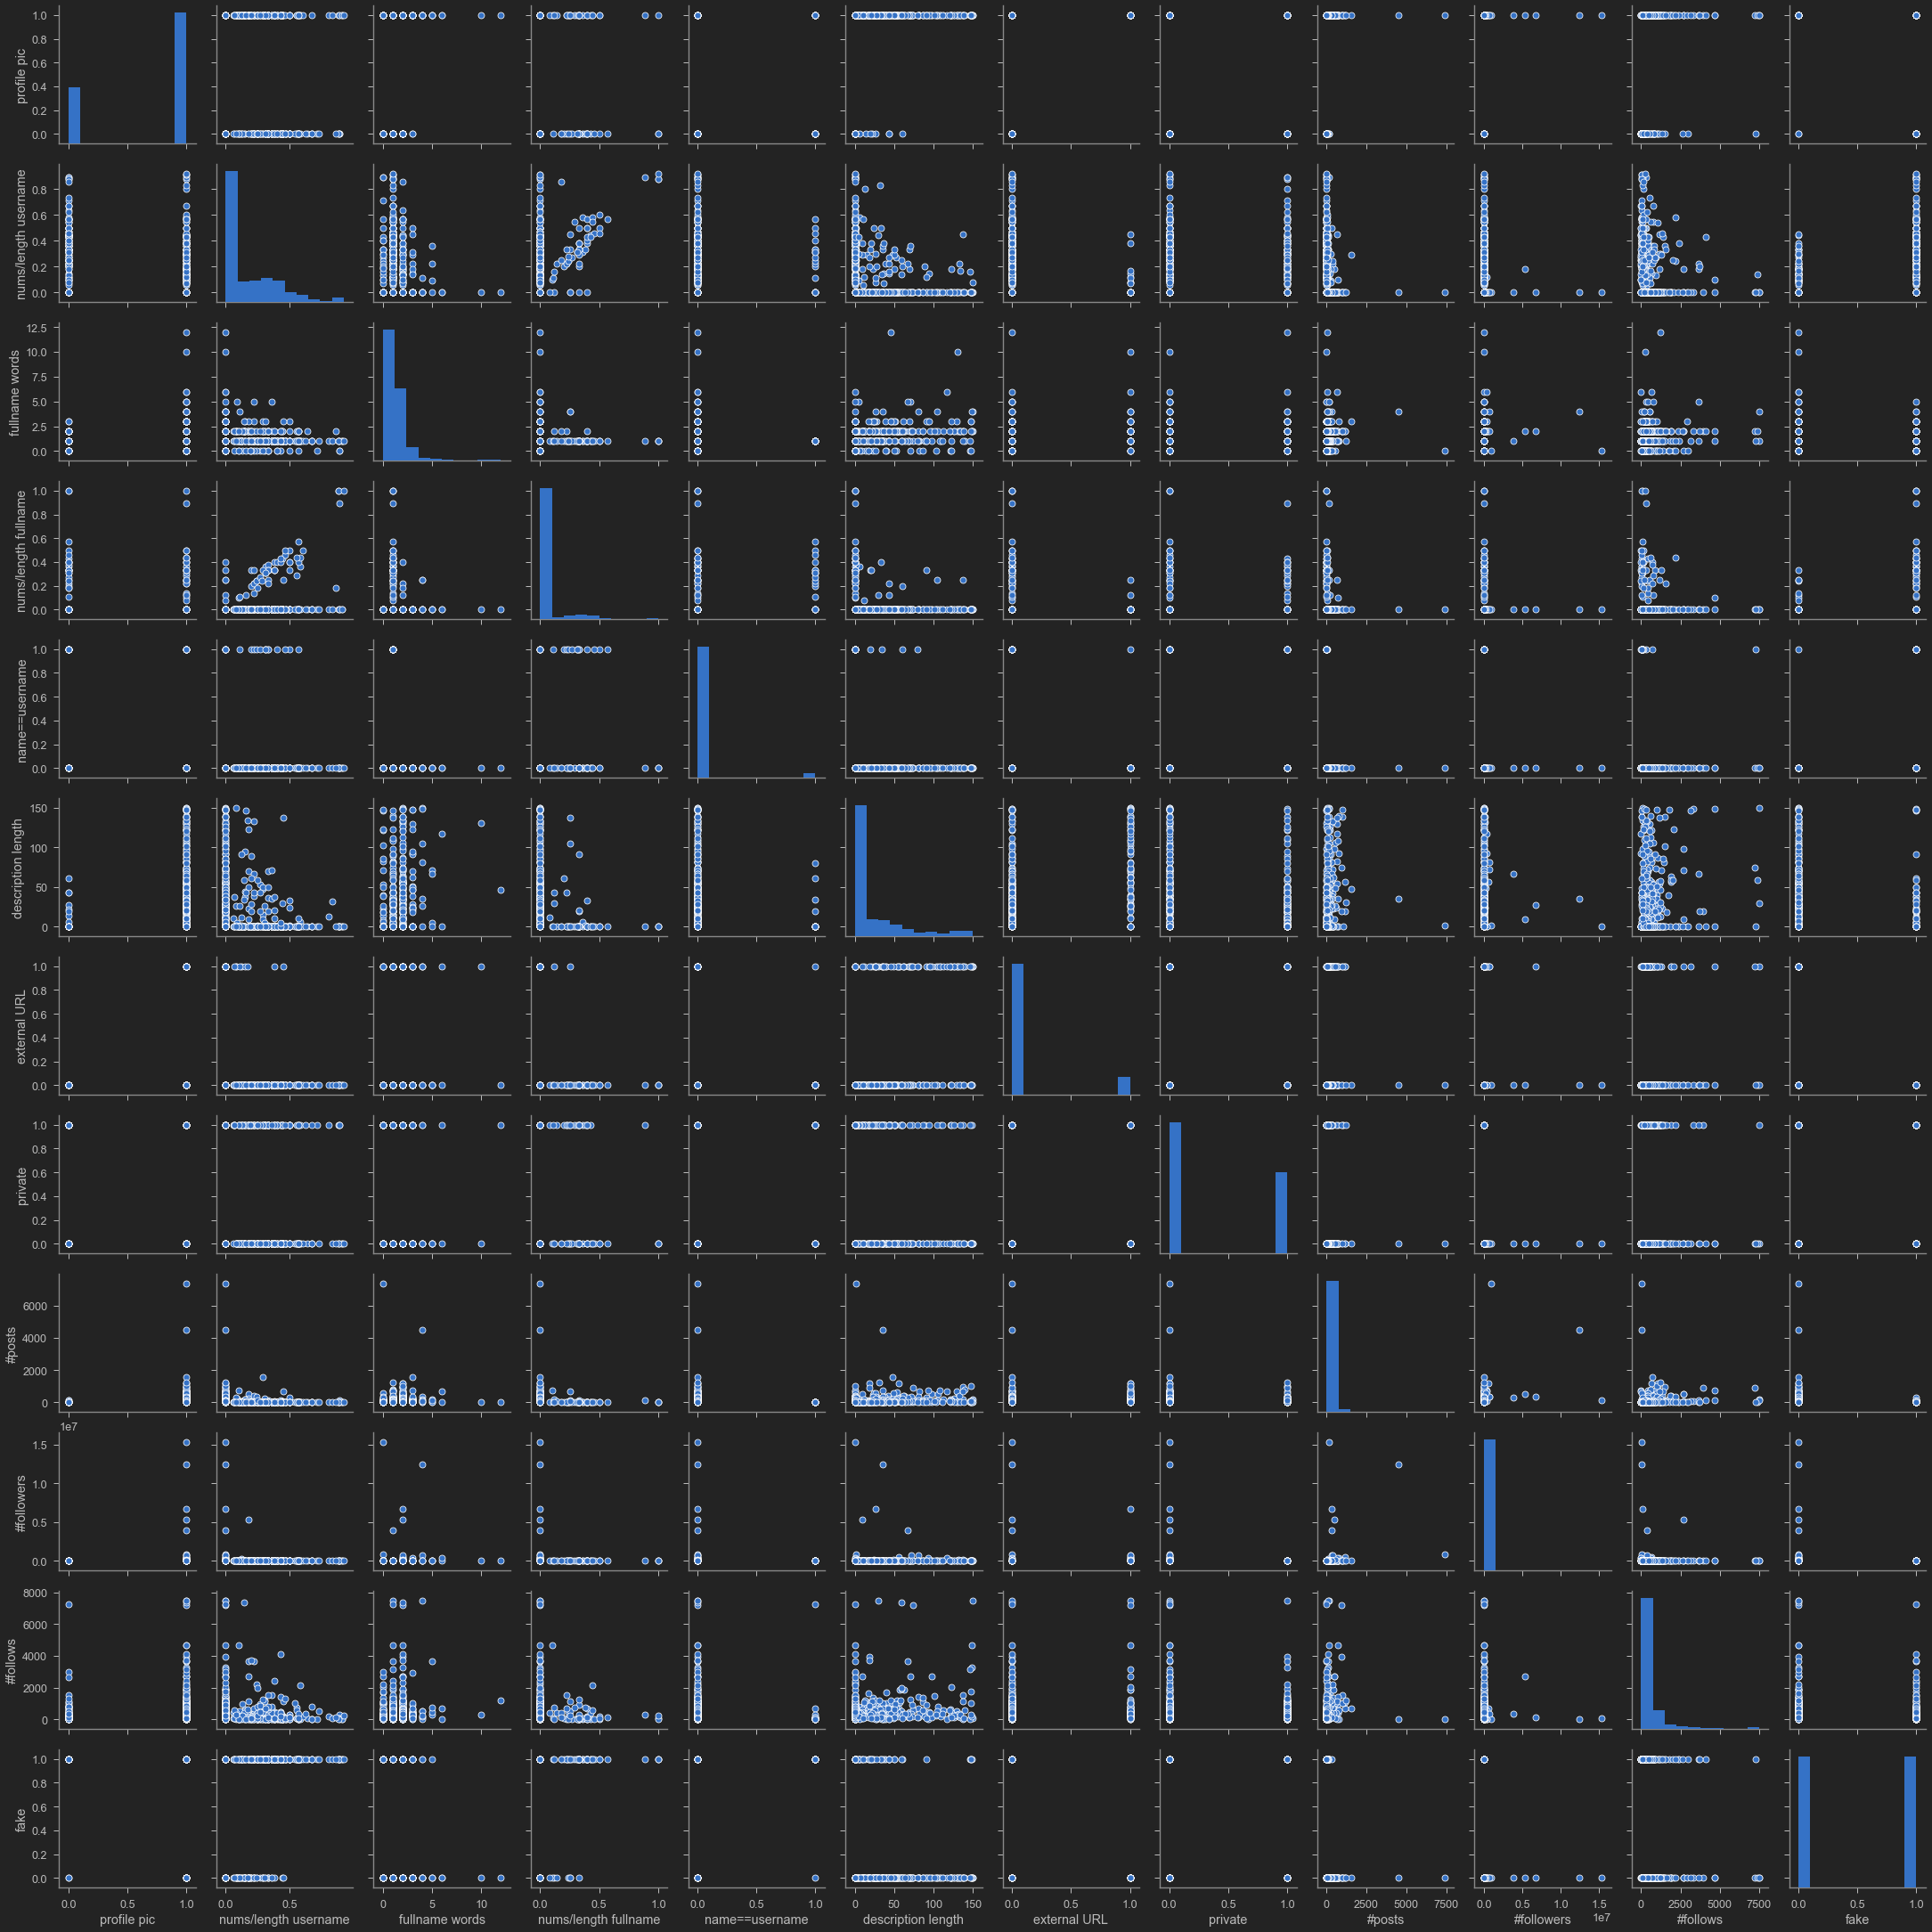

In [49]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pairplot(train_set)

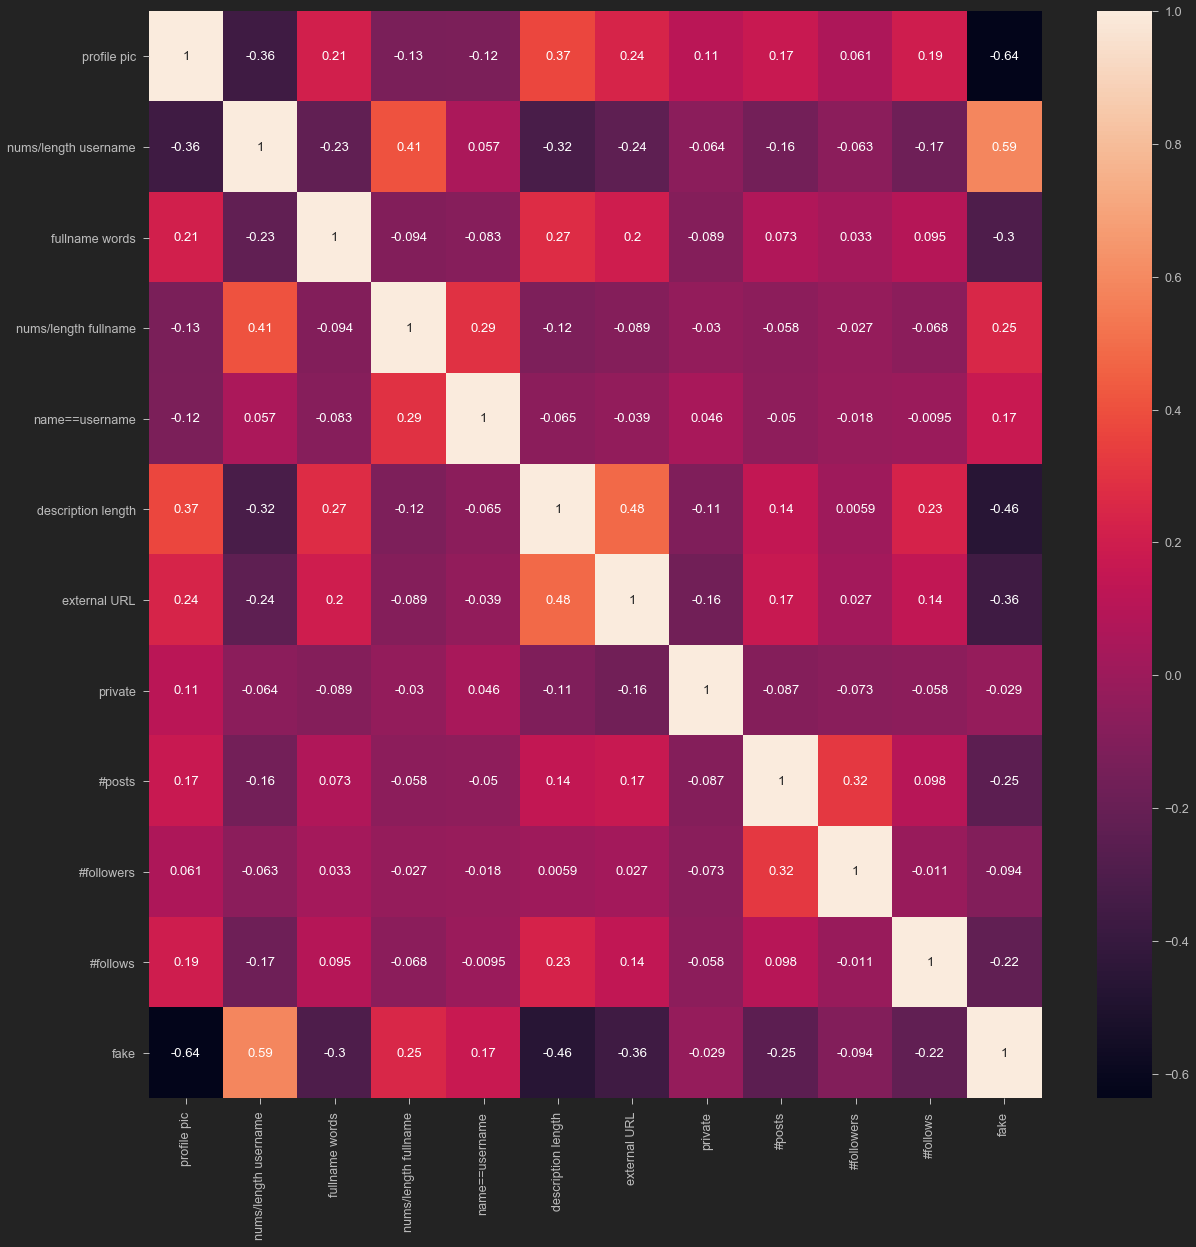

In [50]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = train_set.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

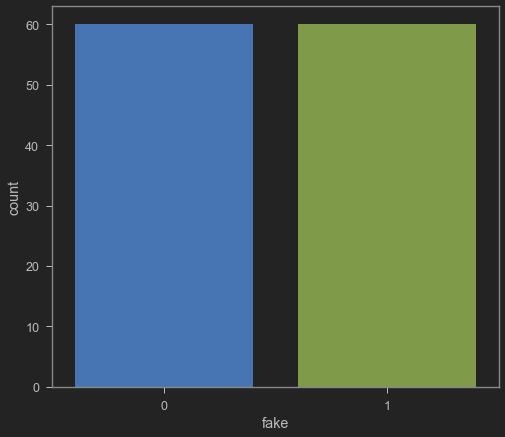

In [51]:
sns.countplot(test_set['fake'])

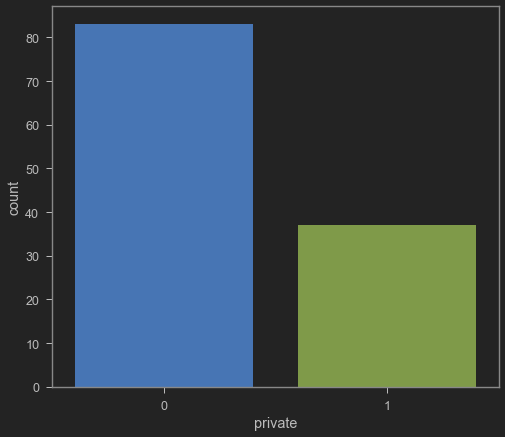

In [52]:
sns.countplot(test_set['private'])

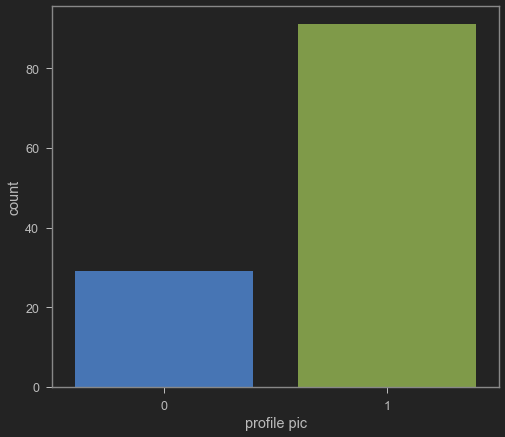

In [55]:
sns.countplot(test_set['profile pic'])

# TASK #5: PREPARE THE DATA TO FEED THE MODEL

In [59]:
# Training and testing dataset (inputs)
x_train = train_set.drop(['fake'],axis=1)
x_test = test_set.drop(['fake'],axis=1)
x_train.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [60]:
x_test.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356


In [61]:
# Training and testing dataset (Outputs)
y_train = train_set['fake']
y_test = test_set['fake']

In [62]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [63]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [64]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [77]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [78]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [79]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [80]:
x_test.shape

(120, 11)

In [81]:
x_train.shape

(576, 11)

In [82]:
y_test.shape

(120, 2)

In [83]:
y_train.shape

(576, 2)

# BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [150]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim= 11,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(150,activation= 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(150,activation= 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(25,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation= 'softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 50)                600       
_________________________________________________________________
dropout_17 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 150)               7650      
_________________________________________________________________
dense_64 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_65 (Dense)             (None, 25)                3775      
_________________________________________________________________
dropout_18 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 2)               

In [151]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [153]:
trainer = model.fit(x_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/20
518/518 [==============================] - 0s 313us/sample - loss: 0.1349 - accuracy: 0.9498 - val_loss: 0.4499 - val_accuracy: 0.8103
Epoch 2/20
518/518 [==============================] - 0s 216us/sample - loss: 0.1060 - accuracy: 0.9517 - val_loss: 0.2893 - val_accuracy: 0.8966
Epoch 3/20
518/518 [==============================] - 0s 133us/sample - loss: 0.1276 - accuracy: 0.9402 - val_loss: 0.3440 - val_accuracy: 0.8793
Epoch 4/20
518/518 [==============================] - 0s 156us/sample - loss: 0.1018 - accuracy: 0.9517 - val_loss: 0.5323 - val_accuracy: 0.7931
Epoch 5/20
518/518 [==============================] - 0s 172us/sample - loss: 0.1221 - accuracy: 0.9421 - val_loss: 0.4223 - val_accuracy: 0.8276
Epoch 6/20
518/518 [==============================] - 0s 363us/sample - loss: 0.1362 - accuracy: 0.9363 - val_loss: 0.7013 - val_accuracy: 0.7414
Epoch 7/20
518/518 [==============================] - 0s 256us/sample - loss: 0

# ASSESS THE PERORMANCE OF TRAINED MODEL

In [148]:
print(trainer.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


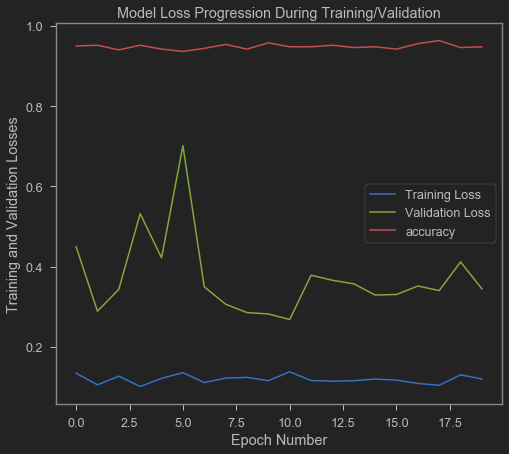

In [154]:
plt.plot(trainer.history['loss'])
plt.plot(trainer.history['val_loss'])
plt.plot(trainer.history['accuracy'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss', 'accuracy'])


In [155]:
pred = model.predict(x_test)

In [156]:
predicted_value = []
test = []
for i in pred:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [158]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.89      0.85      0.87        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



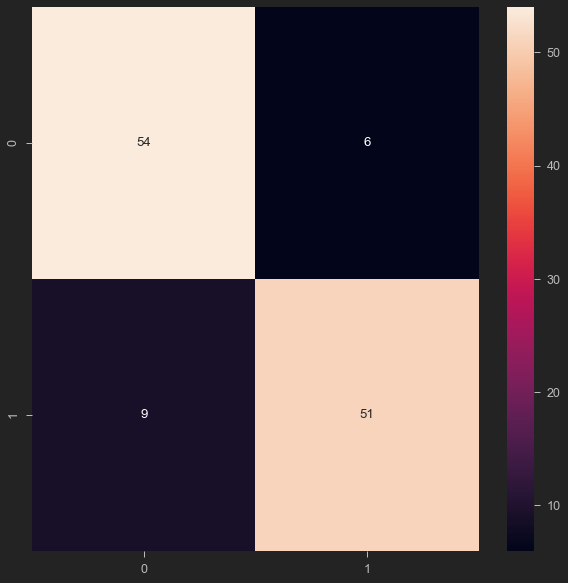

In [159]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

**Our model predictions are true for 105 accounts, where as the predictions are false for 15 accounts out of 120 accounts**

# Now, we have our own Fake Instagram Profile Detector!